# Лабораторная работа 5: численное решение системы линейных уравнений, численное интегрирование

### Задание 1: вычисление интеграла

*Вычислить  интеграл $ \ \int\limits_0^\infty sin(t)\cdot e^{-i^2t^2}\,dt$, используя формулу Буля* 

Вычислим интеграл для $i=1$. Так как верхний предел бесконечный, то будем считать интеграл, органичив подынтегральную функцию.

Используем формулу Буля: $I = (7\cdot f(a)+32\cdot f(\frac{3a+b}{4})+12\cdot f(\frac{a+b}{2})+32\cdot f(\frac{a+3b}{4})+7\cdot f(b))\cdot \frac{b-a}{90}$, где $a$ и $b$ $-$ нижний и верхний пределы интегрирования соответственно.

In [1]:
import numpy as np
from scipy import *
from scipy.linalg import *
from math import exp,sin
import matplotlib.pyplot as plt
from time import time

In [2]:
def f(x):
    z=sin(x)*exp(-x**2)
    return z
    #подыинтегральная функция при i=1

def I(y):
    #интеграл
    z=0
    #функция интеграла
    a=0
    #a-нижний предел(фиксированный), равен 0
    #n=0 - количество итераций, затрачиваемое на вычисление интеграла
    h=2/y 
    #h-шаг разбиения интеграла (взяли произвольный)
    #y-номер итерации
    while True:
        b=a+h
        #b-верхний(двигаем)
        c=((7*f(a))+32*f((3*a+b)/4)+12*f((a+b)/2)+32*f((a+3*b)/4)+7*f(b))*(b-a)/90
        #формула
        a=a+h
        z=z+c
        #n=n+1
        
        if f(b)<0.01:
            break
            #условие выхода из цикла
    return z

#уточнение значения
y=1
i1=2
i0=1
while abs(i1-i0)>0.001:
    i0=I(y)
    i1=I(y+1)
    y=y+1
print("I =" ,i1)


I = 0.42438827948870833


### Задание 2: построить график подыинтегральной функции, а также график зависимости интеграла от номера итерации ($i=1$)

График подынтегральной функции.

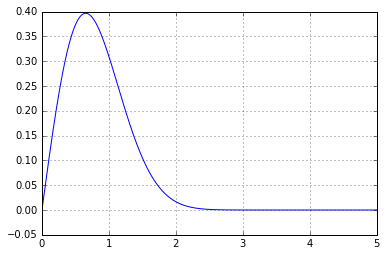

In [3]:
% matplotlib inline
X=np.linspace(0,5,1000)
Y=[f(x) for x in X]
plt.plot(X,Y)
plt.grid(True)
plt.show()

График зависимости значения интеграла от номера итерации $I(y)$

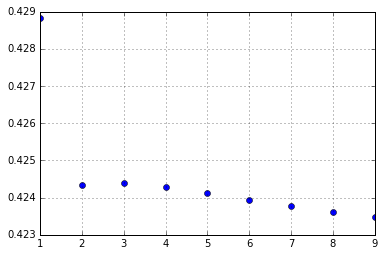

In [4]:
#y-номер итерации
X_y=[]
Y_y=[]
for y in range(1,10):
    X_y.append(y)
    Y_y.append(I(y))
    
plt.plot(X_y,Y_y,'o')
plt.grid(True)
plt.show()


### Задание 3: вычислить интеграл $(i=1)$ с помощью функции $numpy.trapz(\ldots)$ и графически сравнить с результатом из предыдущего задания

Вычислим интеграл при $i=1$

In [5]:
xtr=[]
ytr=[]
j=0
#нижний предел интегрирования
while True:
    xtr.append(j)
    ytr.append(f(j))
    j=j+0.5
    if f(j)<0.01:
            break
It=np.trapz([ytr],x=[xtr]) 

print("I trapz = ",It,)    

I trapz =  [ 0.39819962]


Графическое сравнение значений интегралов

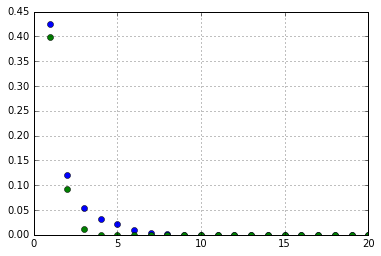

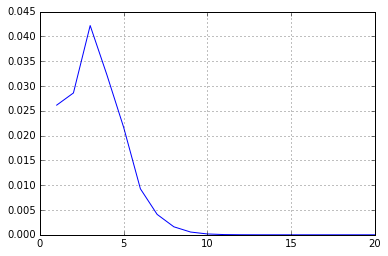

In [6]:
#n - количество интегралов
#k = i в исходной формуле
n=20

def f(x,k):
    z=sin(x)*exp(-(x*k)**2)
    return z

def I(y,k):
    z=0
    a=0
    #y - номер итерации 
    c=0
    s=0
    h=2/y 
    while True:
        b=a+h
        c=((7*f(a,k))+32*f((3*a+b)/4,k)+12*f((a+b)/2,k)+32*f((a+3*b)/4,k)+7*f(b,k))*(b-a)/90
        a=a+h
        s=s+c
        
        if f(b,k)<0.001:
            break
    z=z+s
    return z

#Список значений интегралов, решенных методом Буля
xb1=[]
yb1=[] 
for k in range(1,n+1):
    I0=2
    I1=1
    y=1
    while abs(I1-I0)>0.01:
        I0=I(y,k)
        I1=I(y+1,k)
        y=y+1 
    xb1.append(k)
    yb1.append(I1)
    
    
#Список значений интегралов trapz    
yt1=[]
yt2=[]
for k in range(1,n+1):
    xtr1=[] 
    ytr1=[]
    j=0
    #j - нижний предел интегрирования
    while True:
        xtr1.append(j)
        ytr1.append(f(j,k))
        j=j+0.5
        if f(j,k)<0.01:
            break
    It1=np.trapz([ytr1],x=[xtr1])
    yt1.append(It1)
    yt2.append(yb1[k-1]-It1)



plt.plot(xb1,yb1,'o', xb1,yt1,'o')
plt.grid(True)
plt.show()
#разность решений
plt.plot(xb1,yt2)
plt.grid(True)
plt.show()  

### Задание 4: решить систему уравнений методом релаксации с относительной точностью 0.001

$n^2\cdot x_{i}=\sum_{j=1}^n \frac{j+4\cdot sin(j)}{1+2\cdot i^2 +j^4}\cdot x_j + \int\limits_0^\infty sin(t)\cdot e^{-i^2t^2}\,dt$, где $n$ - число уравнений системы.

Дана система: $A\cdot x=b$. Для итерационного метода решения системы правило построения элементов итерационной последовательности имеет следующий вид: $x^{k+1}=T_k \cdot x^k + H_k \cdot b$, где $T_k=E-H_k \cdot A$, $H_k$ $-$ последовательность невырожденных матриц.

Метод релаксации заключается в том, что итерационный процесс имеет следующий вид в векторной форме: $x^{k+1}=(D+\tau \cdot L)^{-1} \cdot ((1-\tau)\cdot D)-\tau \cdot R)\cdot x^k+\tau \cdot(D+\tau \cdot L)^{-1}\cdot b$, где $D$ $-$ диагональная матрица, $L$ $-$ нижняя треугольная матрица с нулевыми диагональными элементами, $R$ $-$ верхняя треугольная матрица с нулевыми диагональными элементами, $b$ $-$ вектор-столбец правой части, $\tau$ $-$ некоторая константа. 

Видно, что $H_k =\tau \cdot(D+\tau \cdot L)^{-1}$ и $T_k =(D+\tau \cdot L)^{-1} \cdot ((1-\tau)\cdot D)-\tau \cdot R)$.

Выполнено: $L+D+R=A$.

В заданной системе $A$ $-$ матрица коэффициентов, $b$ $-$ вектор-столбец значений интегралов, $\tau = 0.1$ (нижняя релаксация).  

In [7]:
n=1000
#составляем матрциу коэффициентов
A=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        A[i][j]=-((j+1)+4*sin(j+1))/(1+2*(i+1)**2+pow(j+1,4))

E=np.eye(n)
A=A+E*n**2

D=E*A
#диагональная

b=np.zeros((n, 1))
for k in range(1,n):
    I0=2
    I1=1
    y=1
    while abs(I1-I0)>0.001:
        I0=I(y,k)
        I1=I(y+1,k)
        y=y+1 
    b[k-1][0]=I1

L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.1
#нижняя релаксация
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))

#решения системы
X0=np.zeros((n, 1))

#итерационный процесс
while True:
    X1=dot(T,X0)+dot(H,b)
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
    
print("x1 = ", X1[0][0])


x1 =  4.20684729333e-07


### Задание 5

*Решить систему этим же методом для $n=10000$ *

In [8]:
n=10000

#составляем матрциу коэффициентов
A=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        A[i][j]=-((j+1)+4*sin(j+1))/(1+2*(i+1)**2+pow(j+1,4))

E=np.eye(n)
A=A+E*n**2

D=E*A
#диагональная

b=np.zeros((n, 1))
for k in range(1,n):
    I0=2
    I1=1
    y=1
    while abs(I1-I0)>0.001:
        I0=I(y,k)
        I1=I(y+1,k)
        y=y+1 
    b[k-1][0]=I1

L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.9
#верхняя релаксация
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))

#решения системы
X0=np.zeros((n, 1))
Hb=dot(H,b)
#итерационный процесс
while True:
    X1=dot(T,X0)+Hb
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  
    
print("x1 = ", X1[0][0])
S=solve(A,b)
print(S[0][0])

x1 =  4.24345845672e-09
4.24388284502e-09


### Задание 6: построить график решения $X(i)$, а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы

График зависимости решения $X(i)$

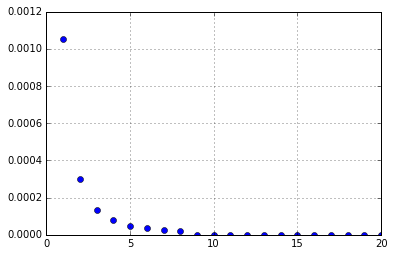

In [8]:
n=20
#для n=20 еще раз посчитаем значения
#составляем матрциу коэффициентов
A=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        A[i][j]=-((j+1)+4*sin(j+1))/(1+2*(i+1)**2+pow(j+1,4))

E=np.eye(n)
A=A+E*n**2

D=E*A
#диагональная

b=np.zeros((n, 1))
for k in range(1,n):
    I0=2
    I1=1
    y=1
    while abs(I1-I0)>0.001:
        I0=I(y,k)
        I1=I(y+1,k)
        y=y+1 
    b[k-1][0]=I1

L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.1
#нижняя релаксация
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))

#решения системы
X0=np.zeros((n, 1))

#итерационный процесс
while True:
    X1=dot(T,X0)+dot(H,b)
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1  

x=np.linspace(1,n,n)
plt.plot(x,X1,'o')
plt.grid(True)
plt.show()

График зависимости $||X||$$(y)$, $y$ $-$ номер итерации (норма решения)

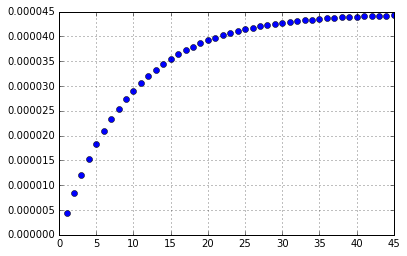

In [9]:
n=100

A=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        A[i][j]=-((j+1)+4*sin(j+1))/(1+2*(i+1)**2+pow(j+1,4))

E=np.eye(n)
A=A+E*n**2

D=E*A

b=np.zeros((n, 1))
for k in range(1,n):
    I0=2
    I1=1
    y=1
    while abs(I1-I0)>0.001:
        I0=I(y,k)
        I1=I(y+1,k)
        y=y+1 
    b[k-1][0]=I1

L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.1
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))


norma=[]
it_y=[]
X0=np.zeros((n, 1))
y=1
while True:
    X1=dot(T,X0)+dot(H,b)
    norma.append(norm(X1))
    it_y.append(y)
    y=y+1
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1
plt.plot(it_y,norma,'o')
plt.grid(True)
plt.show()
    

### Задание 7: решить систему с использованием встроенной функции $numpy.linalg.solve(\ldots)$, результат графически сравнить с заданным методом

метод релаксации: t = 0.05900311470031738
solve: t = 0.09300541877746582


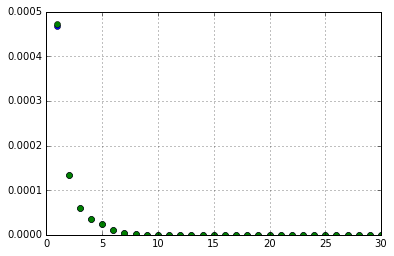

In [10]:
n=30
A=np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        A[i][j]=-((j+1)+4*sin(j+1))/(1+2*(i+1)**2+pow(j+1,4))

b=np.zeros((n, 1))
for k in range(1,n):
    I0=2
    I1=1
    y=1
    while abs(I1-I0)>0.01:
        I0=I(y,k)
        I1=I(y+1,k)
        y=y+1 
    b[k-1][0]=I1

E=np.eye(n)
A=A+E*n**2

#сравним время, затрачиваемое на решение заданным методом и встроенной функцией
tic1=time() 
D=E*A

L=np.zeros((n, n))
for i in range(n):
    for j in range(i):
        L[i][j]=A[i][j]
      
t=0.1
R=A-D-L
H=t*inv(D+t*L)
T=dot(H/t,((1-t)*D-t*R))


X0=np.zeros((n,1))
while True:
    X1=dot(T,X0)+dot(H,b)
    if norm(X0-X1)/norm(X1)<0.001:
        break
    X0=X1   

toc1=time() 
print('метод релаксации: t =', toc1-tic1)

#решение с использованием solve
tic2=time() 
So=solve(A,b)
toc2=time() 
print('solve: t =', toc2-tic2)

xx=np.linspace(1,n,n)
plt.plot(xx,X1,'o',xx, So, 'o')
plt.grid(True)
plt.show()



Выполнила: Тюрина Анастасия, 431 группа